<a href="https://colab.research.google.com/github/hyehyunseo/ESAA_OB/blob/main/1127_kaggle_CNN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[개념 정리]**
**11/27(월) 과제 - 캐글 필사**

### **[ Keras CNN Dog or Cat Classification ]**

**https://www.kaggle.com/code/uysimty/keras-cnn-dog-or-cat-classification**

---

### **1. Import Library**

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import zipfile

### **2. Define Constants**

In [2]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

### **3. Prepare Traning Data**

전체 데이터셋으로 코드를 돌리면 시간이 너무 많이 소요되어, train에서 2000개 test에서 500개만 추출하여 진행했습니다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



* train_2000 / test_500 data 압축 풀기

In [4]:
def unzip_file(zip_file_path, extract_to_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

In [5]:
# train data 경로 설정
train_zip_path = '/content/drive/MyDrive/ESAA/OB/data/dogs_cats/train_2000.zip'  # 압축 파일의 경로
train_extract_to_path = '/content/drive/MyDrive/ESAA/OB/data/dogs_cats/'  # 압축을 푼 파일을 저장할 경로
unzip_file(train_zip_path, train_extract_to_path) # train data 압축 풀기

In [6]:
# test data 경로 설정
test_file_path = '/content/drive/MyDrive/ESAA/OB/data/dogs_cats/test_500.zip'  # 압축 파일의 경로
test_extract_to_path = '/content/drive/MyDrive/ESAA/OB/data/dogs_cats/'  # 압축을 푼 파일을 저장할 경로
unzip_file(test_file_path, test_extract_to_path) # test data 압축 풀기

In [8]:
filenames = os.listdir("/content/drive/MyDrive/ESAA/OB/data/dogs_cats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [9]:
df

filename  category
0     cat.12342.jpg         0
1     cat.12343.jpg         0
2     cat.12344.jpg         0
3     cat.12345.jpg         0
4     cat.12346.jpg         0
...             ...       ...
1995   dog.4685.jpg         1
1996   dog.4686.jpg         1
1997   dog.4687.jpg         1
1998   dog.4688.jpg         1
1999   dog.4689.jpg         1

[2000 rows x 2 columns]

In [10]:
df.head()

filename  category
0  cat.12342.jpg         0
1  cat.12343.jpg         0
2  cat.12344.jpg         0
3  cat.12345.jpg         0
4  cat.12346.jpg         0

In [11]:
df.tail()

filename  category
1995  dog.4685.jpg         1
1996  dog.4686.jpg         1
1997  dog.4687.jpg         1
1998  dog.4688.jpg         1
1999  dog.4689.jpg         1

* see total in count

<Axes: >

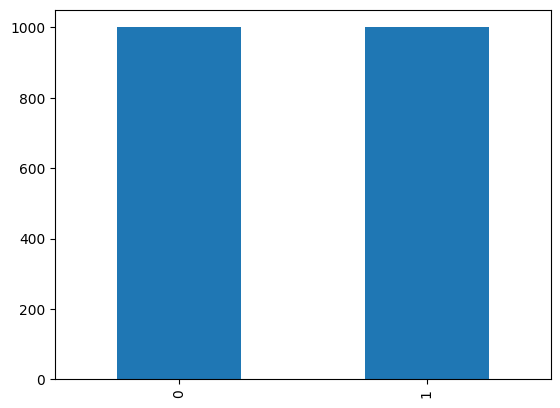

In [12]:
df['category'].value_counts().plot.bar()

* see sample image

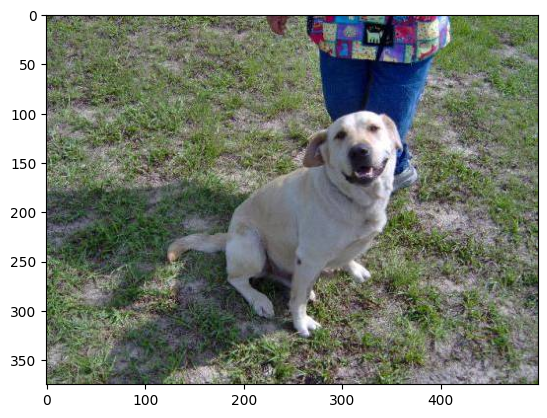

In [14]:
sample = random.choice(filenames)
image = load_img("/content/drive/MyDrive/ESAA/OB/data/dogs_cats/train/"+sample)
plt.imshow(image)

### **4. Build Model**

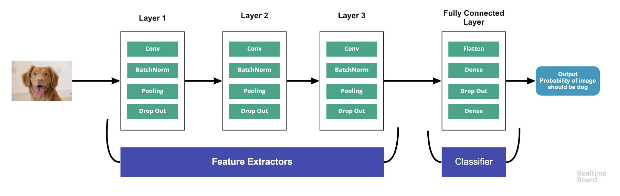

* Input Layer - 이미지를 1차원 배열로 재구성함. 예를 들어, 이미지가 64X64 크기라면 (4096,1) 배열로 변환함
* Conv Layer: 이 층은 이미지의 특징을 추출함
* Pooling Layer: 이 층은 Convolution 후에 입력 이미지의 spatial volume을 줄인다.
* Fully Connected Layer: 한 층에서 다른 층을 연결
* Output Layer: 예측값 레이어

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        2

### **5. Callbacks**

In [16]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

* early stop

    과적합을 방지하기 위해 10개의 에포크가 지나도 val_loss 값이 감소하지 않으면 학습을 중지하도록 설정함

In [17]:
earlystop = EarlyStopping(patience=10)

* Learning Rate Reduction

    accuracy가 2 step동안 증가하지 않으면 learning rate를 줄이도록 설정함

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [19]:
callbacks = [earlystop, learning_rate_reduction]

### **6. Prepare data**

`class_mode="categorical"` image generator를 사용할 것이므로, 카테고리 열을 문자열로 반환해야한다.  따라서 1을 개로, 0을 고양이로 변환한다.

In [20]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

In [21]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<Axes: >

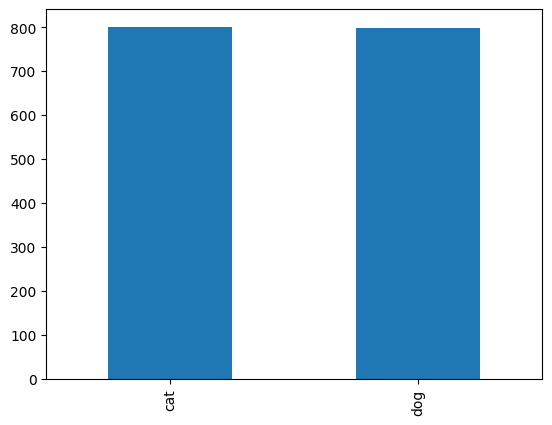

In [22]:
train_df['category'].value_counts().plot.bar()

<Axes: >

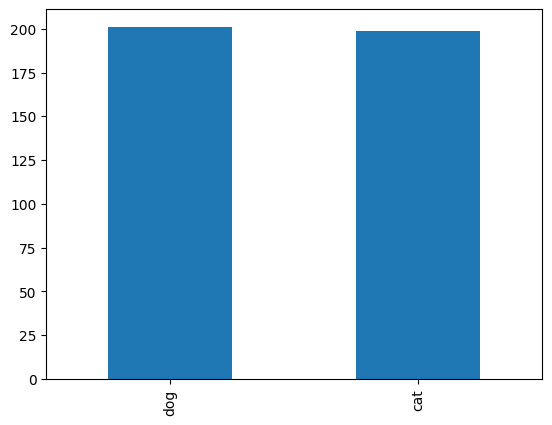

In [23]:
validate_df['category'].value_counts().plot.bar()

In [24]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

### **7. generator**

* training generator

In [25]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    "/content/drive/MyDrive/ESAA/OB/data/dogs_cats/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1600 validated image filenames belonging to 2 classes.


* validation generator

In [26]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    "/content/drive/MyDrive/ESAA/OB/data/dogs_cats/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 400 validated image filenames belonging to 2 classes.


* see how our generator work

In [27]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    "/content/drive/MyDrive/ESAA/OB/data/dogs_cats/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


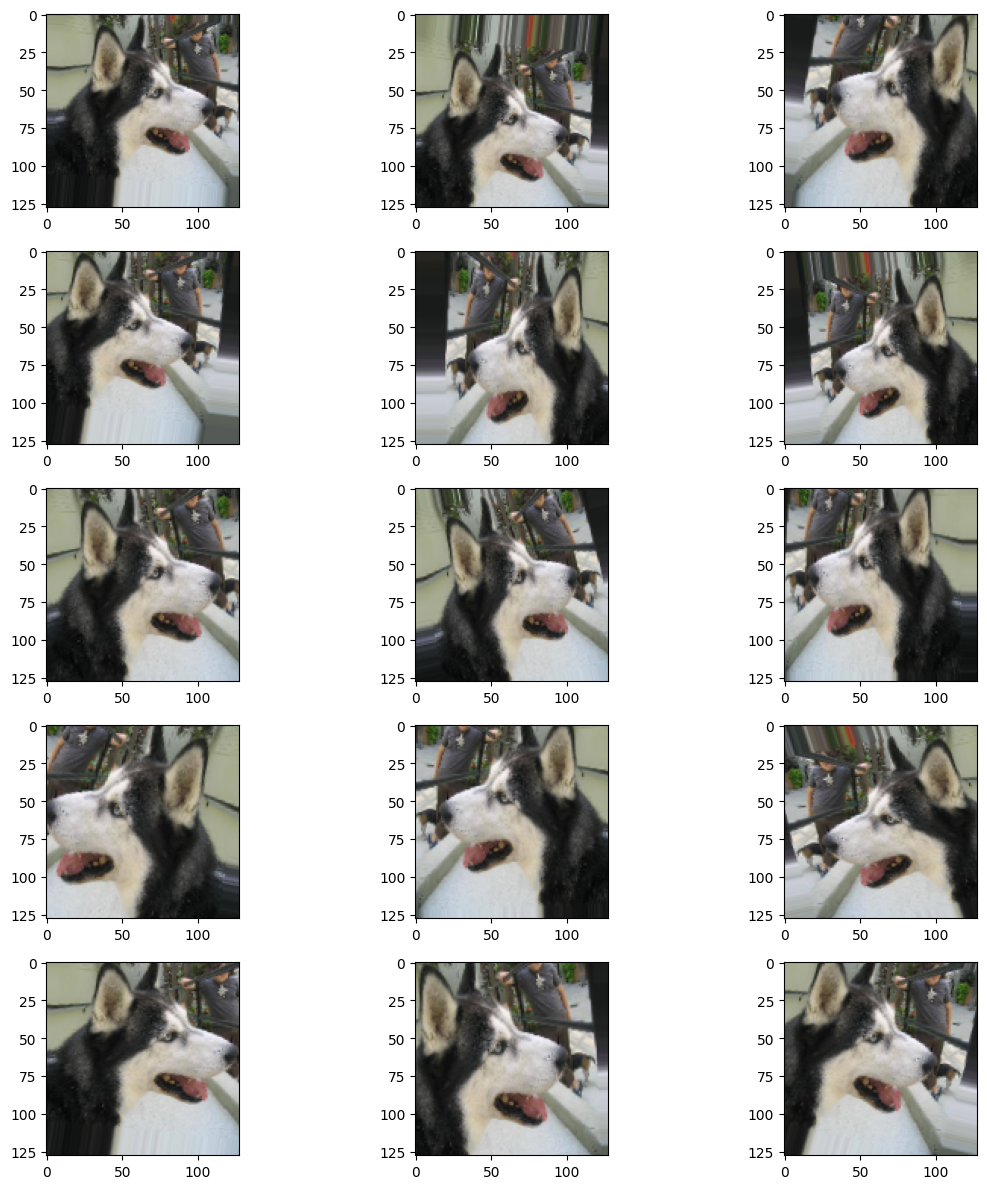

In [28]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### **8. Fit model**

In [30]:
epochs=3 if FAST_RUN else 10
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10


<ipython-input-30-43318625620a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


106/106 [==============================] - ETA: 0s - loss: 1.2804 - accuracy: 0.5571

106/106 [==============================] - 61s 577ms/step - loss: 1.2804 - accuracy: 0.5571 - val_loss: 1.3791 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.9821 - accuracy: 0.5514

106/106 [==============================] - 57s 540ms/step - loss: 0.9821 - accuracy: 0.5514 - val_loss: 1.5290 - val_accuracy: 0.4974 - lr: 0.0010
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.8727 - accuracy: 0.5521

106/106 [==============================] - 58s 546ms/step - loss: 0.8727 - accuracy: 0.5521 - val_loss: 0.7410 - val_accuracy: 0.5410 - lr: 0.0010
Epoch 4/10
106/106 [==============================] - ETA: 0s - loss: 0.7799 - accuracy: 0.6032

106/106 [==============================] - 57s 538ms/step - loss: 0.7799 - accuracy: 0.6032 - val_loss: 0.7750 - val_accuracy: 0.5308 - lr: 0.0010
Epoch 5/10
106/106 [==============================] - ETA: 0s - loss: 0.7311 - accuracy: 0.5968

106/106 [==============================] - 57s 534ms/step - loss: 0.7311 - accuracy: 0.5968 - val_loss: 0.6916 - val_accuracy: 0.6051 - lr: 0.0010
Epoch 6/10
106/106 [==============================] - ETA: 0s - loss: 0.6867 - accuracy: 0.6208

106/106 [==============================] - 57s 542ms/step - loss: 0.6867 - accuracy: 0.6208 - val_loss: 0.7682 - val_accuracy: 0.6077 - lr: 0.0010
Epoch 7/10
106/106 [==============================] - ETA: 0s - loss: 0.6493 - accuracy: 0.6372

106/106 [==============================] - 58s 544ms/step - loss: 0.6493 - accuracy: 0.6372 - val_loss: 0.9192 - val_accuracy: 0.5538 - lr: 0.0010
Epoch 8/10
106/106 [==============================] - ETA: 0s - loss: 0.6230 - accuracy: 0.6656

106/106 [==============================] - 57s 542ms/step - loss: 0.6230 - accuracy: 0.6656 - val_loss: 0.6039 - val_accuracy: 0.6564 - lr: 0.0010
Epoch 9/10
106/106 [==============================] - ETA: 0s - loss: 0.6160 - accuracy: 0.6934

106/106 [==============================] - 58s 550ms/step - loss: 0.6160 - accuracy: 0.6934 - val_loss: 0.6655 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 10/10
106/106 [==============================] - ETA: 0s - loss: 0.6176 - accuracy: 0.6757

106/106 [==============================] - 58s 551ms/step - loss: 0.6176 - accuracy: 0.6757 - val_loss: 0.7270 - val_accuracy: 0.5846 - lr: 0.0010


* save model

In [31]:
model.save_weights("model.h5")

### **9. Virtualize Training**

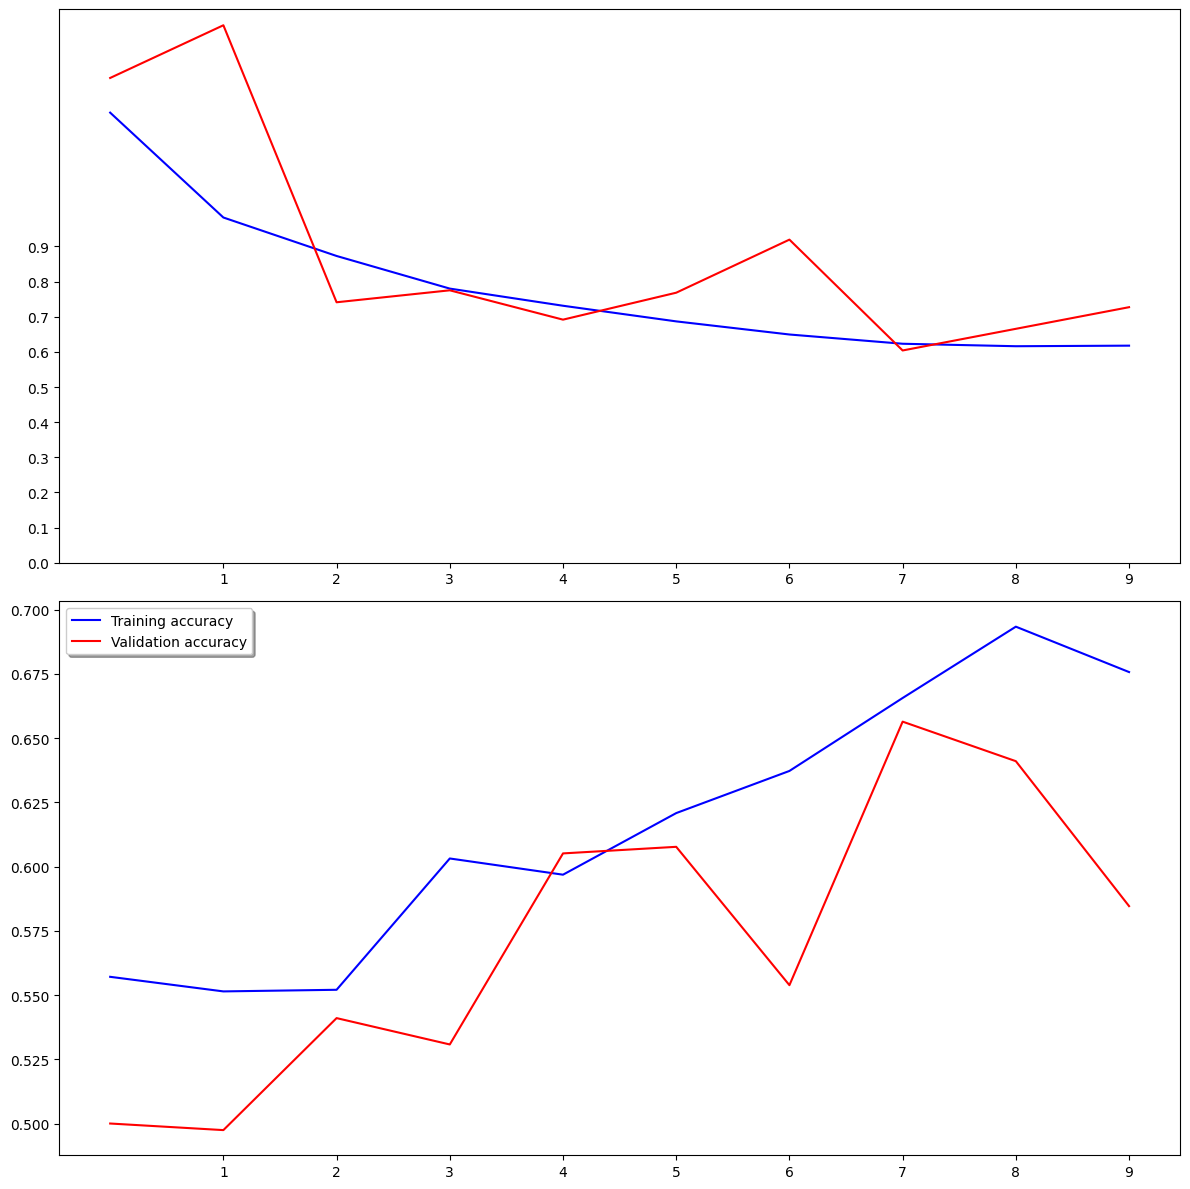

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### **10. Testing data**

* Prepare Testing data

In [35]:
test_filenames = os.listdir("/content/drive/MyDrive/ESAA/OB/data/dogs_cats/test") # 시간관계상 500개만 사용
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

* create testing generator

In [36]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/drive/MyDrive/ESAA/OB/data/dogs_cats/test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

Found 500 validated image filenames.


### **11. predict**

In [37]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-37-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


* 카테고리 분류의 경우, 예측은 각 카테고리의 확률과 함께 제공됨. 따라서 가장 높은 확률을 가진 카테고리를 선택함

In [38]:
test_df['category'] = np.argmax(predict, axis=-1)

*  `train_generator.class_indices`를 사용하여 예측 카테고리를 generator 클래스로 변환

In [39]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

* 데이터를 {1: 'dog', 0: 'cat'}으로 매필하기

In [40]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

* virtualize result

<Axes: >

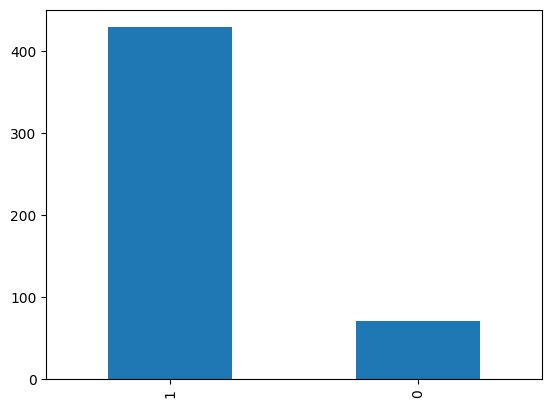

In [41]:
test_df['category'].value_counts().plot.bar()

* See predicted result with images

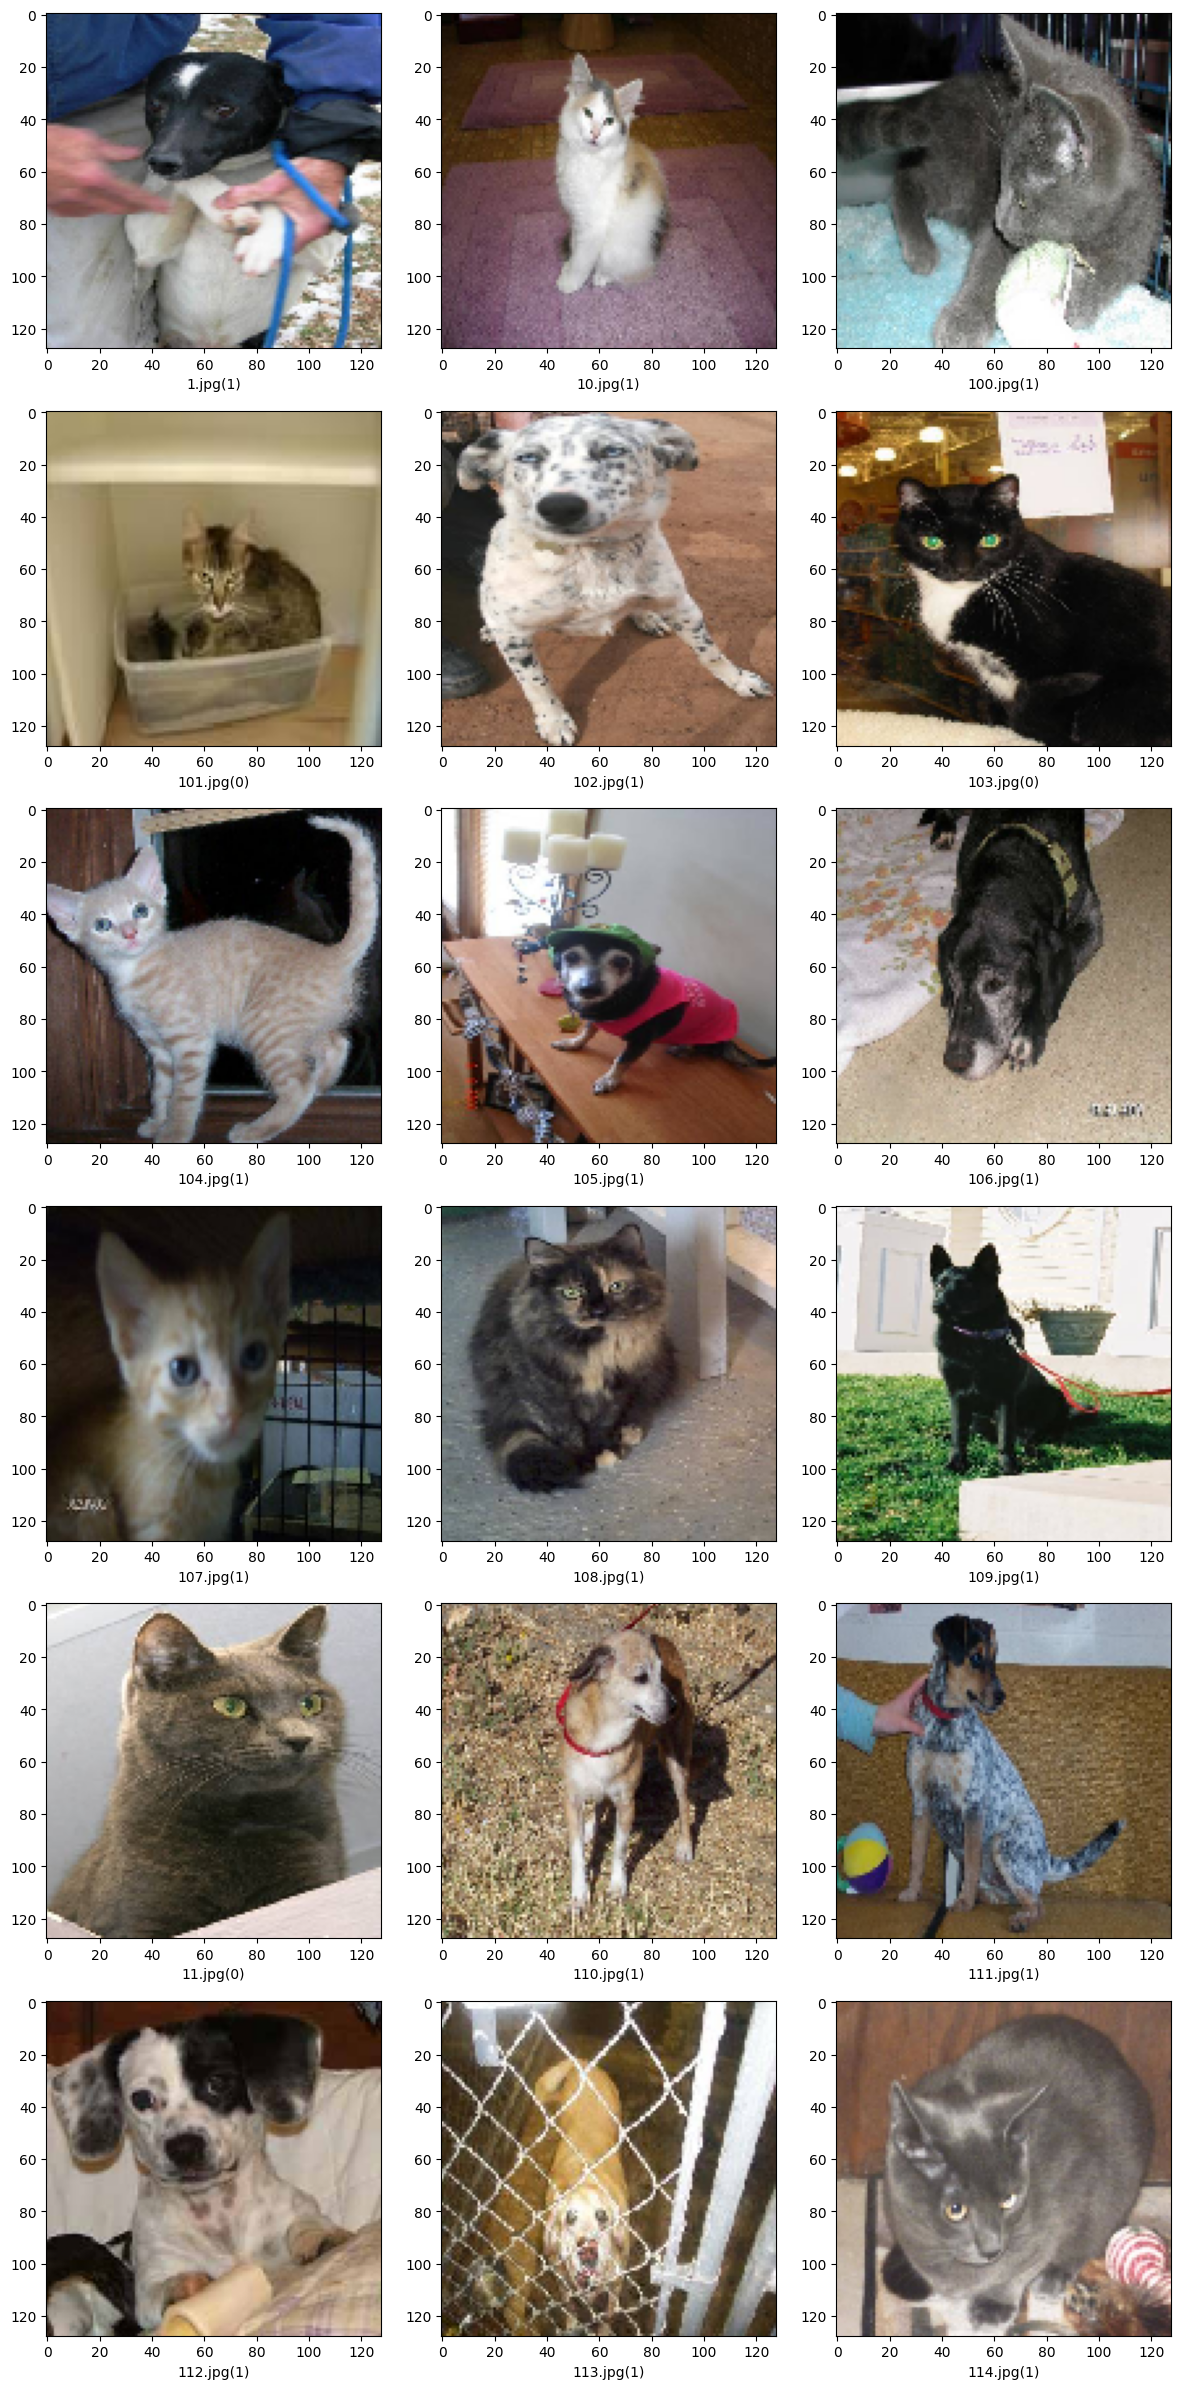

In [42]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/ESAA/OB/data/dogs_cats/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

### **12. Submission**

In [43]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
# submission_df.to_csv('submission.csv', index=False)

In [44]:
submission_df

id  label
0      1      1
1     10      1
2    100      1
3    101      0
4    102      1
..   ...    ...
495   84      1
496   85      1
497   86      1
498   87      1
499   88      1

[500 rows x 2 columns]